In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
# Đọc dữ liệu từ file csv
df = pd.read_csv('/content/ETH-USD.csv')

In [ ]:
# Chuyển cột 'Date' sang dạng datetime và đặt làm index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
# Chỉ lấy cột 'Close' làm dữ liệu dự đoán
data = df[['Close']]

In [ ]:
# Function to train ARIMA model and predict future prices
def train_and_predict_arima(data, train_size, predict_days):
    # Chia dữ liệu train và test
    train_data = data[:int(len(data) * train_size)]
    test_data = data[int(len(data) * train_size):]

    # Huấn luyện mô hình ARIMA
    model = ARIMA(train_data, order=(5, 1, 0))  # Thông số (p, d, q) có thể được tối ưu hóa
    model_fit = model.fit()

    # Dự đoán trên dữ liệu test
    y_pred_test = model_fit.forecast(steps=len(test_data))

    # Dự đoán giá đóng cửa cho các ngày tiếp theo
    predictions = {}
    for days in predict_days:
        y_pred = model_fit.forecast(steps=len(test_data) + days)[-days:]
        predictions[f'{days}_days'] = y_pred

    return train_data, test_data, y_pred_test, predictions

In [ ]:
# Các tỷ lệ train-test
train_test_ratios = [0.6, 0.7, 0.8]
predict_days = [30, 60, 90]
results = {}


In [ ]:
# Huấn luyện và dự đoán cho từng tỷ lệ
for ratio in train_test_ratios:
    train_data, test_data, y_pred_test, predictions = train_and_predict_arima(data, ratio, predict_days)
    results[ratio] = {
        'train_data': train_data,
        'test_data': test_data,
        'y_pred_test': y_pred_test,
        'predictions': predictions
    }

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

In [ ]:
# Function to calculate metrics
def calculate_metrics(true_values, predicted_values):
    mse = mean_squared_error(true_values, predicted_values)
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100
    return mse, mae, rmse, mape

In [ ]:
# Tính toán và in ra sai số cho từng tỷ lệ và in ra giá trị dự đoán
for ratio, result in results.items():
    train_percent = round(ratio * 100)
    test_percent = round((1 - ratio) * 100)
    print(f"Train-Test Ratio: {train_percent}:{test_percent}")

    # Sai số trên dữ liệu test
    true_test_values = result['test_data']['Close']
    predicted_test_values = result['y_pred_test']
    mse_test, mae_test, rmse_test, mape_test = calculate_metrics(true_test_values, predicted_test_values)

    print(f"Test Metrics:")
    print(f"MSE: {mse_test:.4f}")
    print(f"MAE: {mae_test:.4f}")
    print(f"RMSE: {rmse_test:.4f}")
    print(f"MAPE: {mape_test:.2f}%\n")

Train-Test Ratio: 60:40
Test Metrics:
MSE: 1752006.6816
MAE: 1192.4164
RMSE: 1323.6339
MAPE: 71.12%

Train-Test Ratio: 70:30
Test Metrics:
MSE: 898046.3955
MAE: 891.3743
RMSE: 947.6531
MAPE: 57.47%

Train-Test Ratio: 80:20
Test Metrics:
MSE: 260552.2782
MAE: 443.8640
RMSE: 510.4432
MAPE: 24.14%



In [ ]:
# Sai số trên các dự đoán 30, 60, 90 ngày và in ra giá trị dự đoán
for days in predict_days:
  pred_index = pd.date_range(start=result['test_data'].index[-1], periods=days + 1, freq='D')[1:]
  true_values = data['Close'].reindex(pred_index, method='nearest')
  predicted_values = result['predictions'][f'{days}_days']
  mse, mae, rmse, mape = calculate_metrics(true_values, predicted_values)
  print(f"{days} Days Predictions:")
  print(f"MSE: {mse:.4f}")
  print(f"MAE: {mae:.4f}")
  print(f"RMSE: {rmse:.4f}")
  print(f"MAPE: {mape:.2f}%")
  print("Predicted values:")
  print(predicted_values)
  print("\n")

30 Days Predictions:
MSE: 1135113.6725
MAE: 1065.4171
RMSE: 1065.4171
MAPE: 45.29%
Predicted values:
2024-01-02    1286.910746
2024-01-03    1286.910746
2024-01-04    1286.910746
2024-01-05    1286.910746
2024-01-06    1286.910746
2024-01-07    1286.910746
2024-01-08    1286.910746
2024-01-09    1286.910746
2024-01-10    1286.910746
2024-01-11    1286.910746
2024-01-12    1286.910746
2024-01-13    1286.910746
2024-01-14    1286.910746
2024-01-15    1286.910746
2024-01-16    1286.910746
2024-01-17    1286.910746
2024-01-18    1286.910746
2024-01-19    1286.910746
2024-01-20    1286.910746
2024-01-21    1286.910746
2024-01-22    1286.910746
2024-01-23    1286.910746
2024-01-24    1286.910746
2024-01-25    1286.910746
2024-01-26    1286.910746
2024-01-27    1286.910746
2024-01-28    1286.910746
2024-01-29    1286.910746
2024-01-30    1286.910746
2024-01-31    1286.910746
Freq: D, Name: predicted_mean, dtype: float64


60 Days Predictions:
MSE: 1135113.6725
MAE: 1065.4171
RMSE: 1065.4171
M

In [ ]:
# Sai số trên các dự đoán 30, 60, 90 ngày và in ra giá trị dự đoán
for days in predict_days:
  pred_index = pd.date_range(start=result['test_data'].index[-1], periods=days + 1, freq='D')[1:]
  true_values = data['Close'].reindex(pred_index, method='nearest')
  predicted_values = result['predictions'][f'{days}_days']
  mse, mae, rmse, mape = calculate_metrics(true_values, predicted_values)
  print(f"{days} Days Predictions:")
  print(f"MSE: {mse:.4f}")
  print(f"MAE: {mae:.4f}")
  print(f"RMSE: {rmse:.4f}")
  print(f"MAPE: {mape:.2f}%")
  print("Predicted values:")
  print(predicted_values)
  print("\n")

30 Days Predictions:
MSE: 671692.8999
MAE: 819.5687
RMSE: 819.5687
MAPE: 34.84%
Predicted values:
2024-01-02    3171.896609
2024-01-03    3171.896609
2024-01-04    3171.896609
2024-01-05    3171.896609
2024-01-06    3171.896609
2024-01-07    3171.896609
2024-01-08    3171.896609
2024-01-09    3171.896609
2024-01-10    3171.896609
2024-01-11    3171.896609
2024-01-12    3171.896609
2024-01-13    3171.896609
2024-01-14    3171.896609
2024-01-15    3171.896609
2024-01-16    3171.896609
2024-01-17    3171.896609
2024-01-18    3171.896609
2024-01-19    3171.896609
2024-01-20    3171.896609
2024-01-21    3171.896609
2024-01-22    3171.896609
2024-01-23    3171.896609
2024-01-24    3171.896609
2024-01-25    3171.896609
2024-01-26    3171.896609
2024-01-27    3171.896609
2024-01-28    3171.896609
2024-01-29    3171.896609
2024-01-30    3171.896609
2024-01-31    3171.896609
Freq: D, Name: predicted_mean, dtype: float64


60 Days Predictions:
MSE: 671692.8999
MAE: 819.5687
RMSE: 819.5687
MAPE: 3

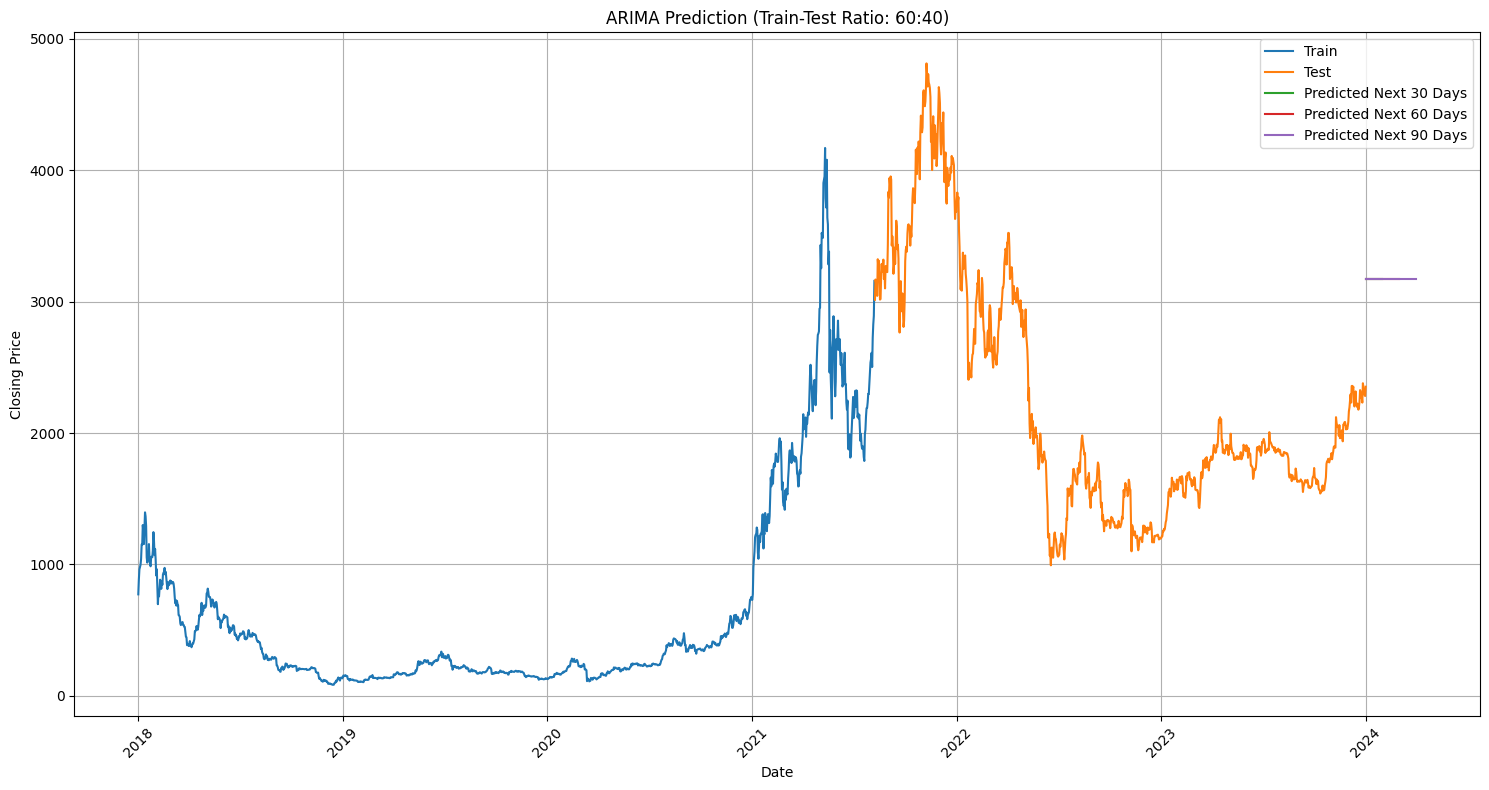

Completed plotting for train-test ratio 60:40


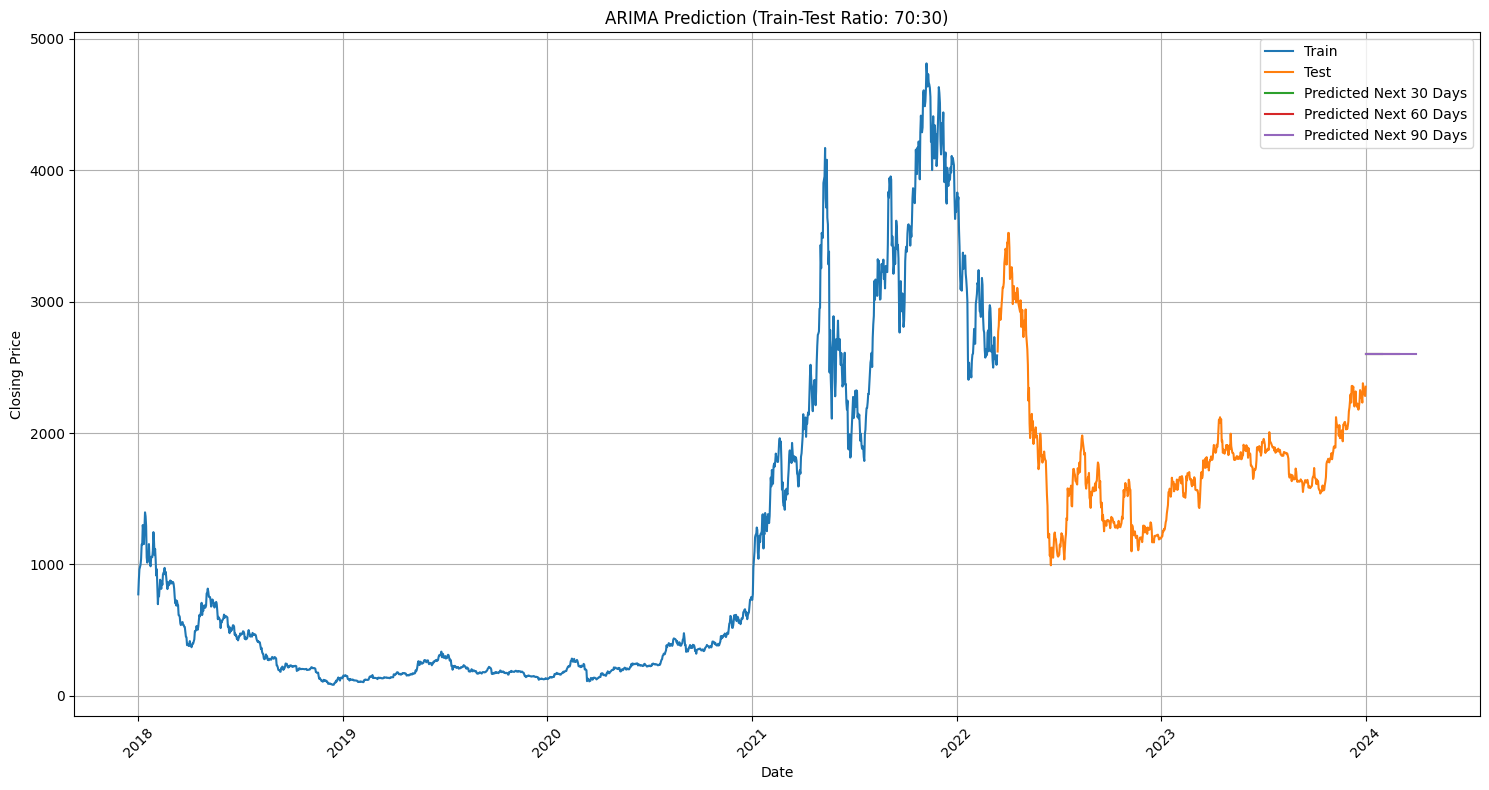

Completed plotting for train-test ratio 70:30


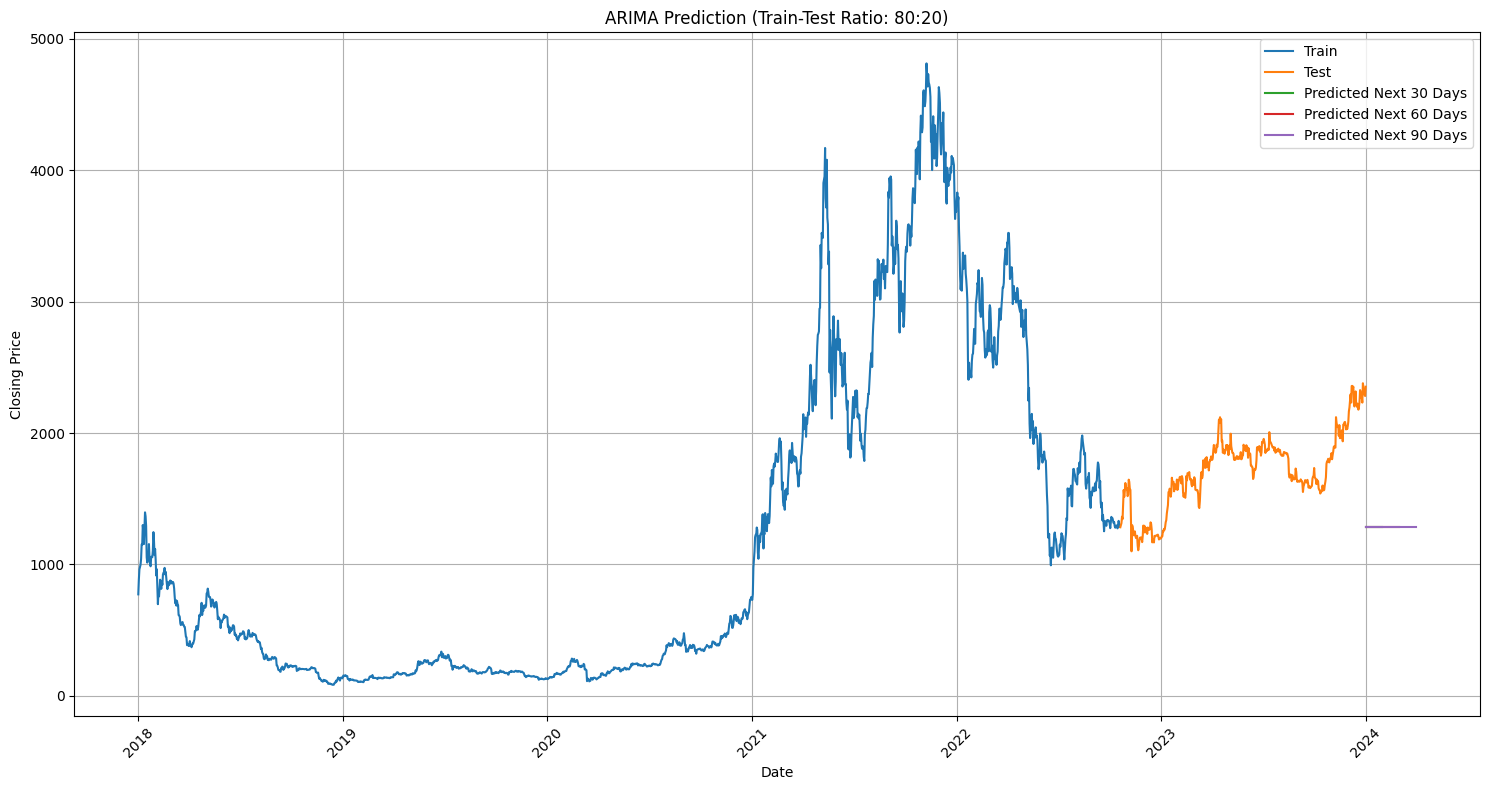

Completed plotting for train-test ratio 80:20


In [ ]:
# Vẽ biểu đồ cho từng tỷ lệ huấn luyện và kiểm tra
for ratio, result in results.items():
    train_percent = round(ratio * 100)
    test_percent = round((1 - ratio) * 100)
    plt.figure(figsize=(15, 8))
    plt.plot(result['train_data'].index, result['train_data']['Close'], label='Train')
    plt.plot(result['test_data'].index, result['test_data']['Close'], label='Test')

    for days in predict_days:
        pred_index = pd.date_range(start=result['test_data'].index[-1], periods=days + 1, freq='D')[1:]
        plt.plot(pred_index, result['predictions'][f'{days}_days'], label=f'Predicted Next {days} Days')

    plt.title(f'ARIMA Prediction (Train-Test Ratio: {train_percent}:{test_percent})')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print(f"Completed plotting for train-test ratio {train_percent}:{test_percent}")